In [50]:
!pip install opencv-python
import numpy as np

In [5]:
import cv2

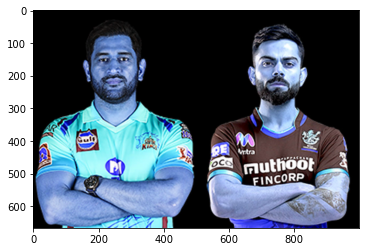

In [14]:
#Code to read image
#image = cv2.imread('path of image')
image = cv2.imread('C:/Users/SONU/Face_mask_detection/Dhoni-kohli-IPL.jpg')
import matplotlib.pyplot as plt
plt.imshow(image)#image but no rgb values

In [15]:
image.shape

(667, 1000, 3)

In [16]:
image[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [41]:
while True:
    cv2.imshow('result',image)
    if cv2.waitKey(2)==27:#27 is the ascii value of escape
        break
cv2.destroyAllWindows()

In [39]:
#we are going to use viola jones face detection algorithm 
#download haar file haar_cascade_facefrontal file to detect face from image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
face_cascade.detectMultiScale(image)#this give us an array contain x,y,width,height of faces in picture

array([[149,  72, 196, 196],
       [666,  94, 176, 176],
       [523, 406, 103, 103]])

In [43]:
#let's draw ractangels on our faces
#cv2.rectangle(image,(x,y),(w,h),b,g,r,brder_thickness)
'''Below code will draw ractangle on faces here we getting 3 we can see one is not face '''
while True:
    faces = face_cascade.detectMultiScale(image)
    for x,y,w,h in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),4)
        cv2.imshow('result',image)
    if cv2.waitKey(2)==27:#27 is the ascii value of escape
        break
cv2.destroyAllWindows()

In [44]:
#So what we will do is we campture the faces wearing mask then npt wearing mask and compare both data set 
#and predict new data set using SVM machine learning model it's so easy

In [48]:
'''Below code will open camera and starting collecting data of my face without mask'''
capture = cv2.VideoCapture(0)
data_withoutmask = []
while True:
    flag, image = capture.read()
    if flag:
        faces = face_cascade.detectMultiScale(image)
        for x,y,w,h in faces:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),4)
            face = image[y:y+h,x:x+w, :]
            face = cv2.resize(face,(50,50))
            print(len(data_withoutmask))
            if len(data_withoutmask)<400:
                data_withoutmask.append(face)
        cv2.imshow('result',image)
        if cv2.waitKey(2)==27 or len(data_withoutmask)>=200:#27 is the ascii value of escape
            break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [53]:
np.save('No_mask_data',data_withoutmask)

In [54]:
'''Below code will open camera and starting collecting data of my face with mask'''
capture = cv2.VideoCapture(0)
data_with_mask = []
while True:
    flag, image = capture.read()
    if flag:
        faces = face_cascade.detectMultiScale(image)
        for x,y,w,h in faces:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),4)
            face = image[y:y+h,x:x+w, :]
            face = cv2.resize(face,(50,50))
            print(len(data_with_mask))
            if len(data_with_mask)<400:
                data_with_mask.append(face)
        cv2.imshow('result',image)
        if cv2.waitKey(2)==27 or len(data_with_mask)>=200:#27 is the ascii value of escape
            break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [55]:
np.save('With_mask_data',data_with_mask)

In [ ]:
#Now the data is collected